# Index Tracking Portfolio

## Table of Contents

- [Required Libraries](#Required-Libraries)


- [SSL Error](#SSL-Error)


- [Obtaining Historical Data: DJI and Its Components](#Obtaining-Historical-Data:-DJI-and-Its-Components)


- [Visualizing DJI Prices vs Each Company's Prices](#Visualizing-DJI-Prices-vs-Each-Company's-Prices)

    - [Normalizing Data](#Normalizing-Data)
    - [Annual Return and Sharpe Ratio](#Annual-Return-and-Sharpe-Ratio)
    
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)


- [Index Tracking Intro](#Index-Tracking-Intro)

    - [The Plan](#The-Plan)
    
    
- [Tracking Portfolio](#Tracking-Portfolio)

    - [Optimal Tracking Portfolio](#Optimal-Tracking-Portfolio)
      
      
- [Forward Testing](#Forward-Testing)

    - [Forward Testing Random Portfolio](#Forward-Testing-Random-Portfolio)

<br></br>

<center>Press the button to see the code behind everything or just view the notebook with code hidden: </center>
<form action="javascript:code_toggle()" class="toggle_button_for_code"><input type="submit" id="toggleButton" value="Show Code"></form>

<br></br>

## Required Libraries

1. Python: pandas, numpy, matplotlib, seaborn

2. <a href="https://pypi.org/project/yfinance/" target="_blank">yfinance Library</a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

-------------------------

## SSL Error

Depending on the version of jupyter/ pandas you have, you may run into a SSL error if you use: 
```python
pd.read_html()
```
to fetch table data. To fix this, please refer to the <a href="https://moreless.medium.com/how-to-fix-python-ssl-certificate-verify-failed-97772d9dd14c" target="_blank">link here</a>.

In [2]:
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

------------------------------------

## Obtaining Historical Data: DJI and Its Components

Data is scraped from the <a href="https://www.slickcharts.com/dowjones" target="_blank">Dow Jones Companies</a> page from Slickcharts to get the 30 companies that make up the Dow.


This is what the dataframe looks like:

In [3]:
# Importing requests library to avoid 
# a 403: Forbidden error
import requests

url = 'https://www.slickcharts.com/dowjones'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

# The table needed when after scraping the website 
# for tabular data is in position 0 of the list that 
# pd.read_html automatically assigns it to:
dow_companies = pd.read_html(r.text)[0].iloc[:,1:]

# Adding all symbols to a list for later use
symbols = dow_companies.Symbol.to_list()

# Saving it to a .csv file for future use
dow_companies.to_csv('dow_companies_info.csv', index = False)

dow_companies

,Company,Symbol,Weight,Price,Chg,% Chg
0,UnitedHealth Group Incorporated,UNH,9.103880,504.57,1.63,(0.32%)
1,Home Depot Inc.,HD,7.353119,409.06,2.84,(0.70%)
2,Goldman Sachs Group Inc.,GS,7.016254,385.51,-2.10,(-0.54%)
3,Microsoft Corporation,MSFT,6.177077,341.50,0.25,(0.07%)
4,McDonald's Corporation,MCD,4.848983,269.25,1.37,(0.51%)
5,salesforce.com inc.,CRM,4.623983,253.71,-1.74,(-0.68%)
6,Amgen Inc.,AMGN,4.086736,227.39,1.62,(0.72%)
7,Visa Inc. Class A,V,3.946994,218.09,0.04,(0.02%)
8,Honeywell International Inc.,HON,3.747879,207.12,0.07,(0.03%)
9,Caterpillar Inc.,CAT,3.740095,207.65,1.03,(0.50%)


<br></br>

Afterwards, I used yfinance library to fetch historical data of DJI. 

For the purposes of this project, grabbing the past ~20 years of data should suffice. Additionally, I only needed the <a href="https://www.investopedia.com/terms/a/adjusted_closing_price.asp" target="_blank">adjusted close prices</a>.

<u>Note</u>: you need the yfinance library for this section, you can install it through the terminal/ command prompt by doing: 

```Shell
pip install yfinance
```

then you can just import it by doing:

```Python
import yfinance as yf
```

In [4]:
# Obtaining historical data from yfinance
dji = yf.download("^DJI", start = "2001-01-01", end = "2021-10-01")
dji.to_csv('dji.csv') # Saving as .csv file for later use

# Showing the DJI dataframe
print('\n')
print('\033[4mDJI DataFrame:\033[0m')
display(dji)

print('\n')
print('\n')

# Only need the Adjusted Close prices
dji.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
dji_adj_close = dji.Adj_Close.to_frame().copy()
print('\033[4mDJI Adj. Closing Prices Only:\033[0m')
dji_adj_close.rename(columns = {'Adj_Close':'DJI_Adj_Close'}, inplace = True)
display(dji_adj_close)

[*********************100%***********************]  1 of 1 completed


DJI DataFrame:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,10646.150391,253300000
2001-01-03,10637.419922,11019.049805,10581.089844,10945.750000,10945.750000,420720000
2001-01-04,10944.940430,11028.000000,10888.419922,10912.410156,10912.410156,382800000
2001-01-05,10912.809570,10919.419922,10627.750000,10662.009766,10662.009766,272650000
2001-01-08,10658.730469,10700.849609,10516.019531,10621.349609,10621.349609,225780000
...,...,...,...,...,...,...
2021-09-24,34762.308594,34857.058594,34648.078125,34798.000000,34798.000000,254310000
2021-09-27,34739.269531,35061.121094,34739.269531,34869.371094,34869.371094,289480000
2021-09-28,34747.699219,34798.210938,34254.648438,34299.988281,34299.988281,379020000






DJI Adj. Closing Prices Only:


,DJI_Adj_Close
Date,
2001-01-02,10646.150391
2001-01-03,10945.750000
2001-01-04,10912.410156
2001-01-05,10662.009766
2001-01-08,10621.349609
...,...
2021-09-24,34798.000000
2021-09-27,34869.371094
2021-09-28,34299.988281


<br></br>

Next, I used yfinance to fetch historical data for each of the 30 companies that make up the DJI. Similar to what was done above, this should return a dataframe with Open, High, Low, Close, Adj. Close, and Volume data for <b>each</b> company. I also exported the data to a .csv file for future use.

In [5]:
all_company_prices = yf.download(symbols, start = "2001-01-01", 
                                          end = "2021-10-01")

individual_company_prices = all_company_prices.loc[:, "Adj Close"].copy()

individual_company_prices.to_csv('individual_company_prices.csv') # Exporting to .csv for future use

display(individual_company_prices)

print('\n')

individual_company_prices.info()

[*********************100%***********************]  30 of 30 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.227738,48.620068,33.921295,40.507767,13.362697,NaN,24.398731,19.775864,21.765093,NaN,...,39.892220,13.691789,5.393500,22.280519,30.072714,12.230480,NaN,17.349758,28.181887,36.389065
2001-01-03,0.250703,51.858185,36.546051,40.875282,13.416804,NaN,30.258099,19.013588,24.199663,NaN,...,38.230057,15.131989,5.574115,21.180685,29.780025,11.867331,NaN,18.342405,27.102955,39.470718
2001-01-04,0.261229,48.475079,35.402729,39.854439,14.047967,NaN,30.670090,18.610889,24.881346,NaN,...,36.460629,15.289824,5.717359,20.524326,28.389807,11.037261,NaN,18.881889,25.765062,37.951000
2001-01-05,0.250703,45.091969,33.687717,38.384373,13.236463,NaN,26.824881,18.754707,24.540503,NaN,...,35.736794,15.506833,5.468238,21.269377,27.877625,11.192900,NaN,18.838734,26.239809,36.431297
2001-01-08,0.253573,45.381950,31.972719,38.547722,13.200403,NaN,26.767656,18.711561,23.469290,NaN,...,35.817226,15.447653,5.742271,21.730591,28.682493,11.153994,NaN,18.863934,26.455593,36.431297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,146.705887,211.831528,175.284256,221.389999,195.739212,285.630005,56.349331,99.450577,176.000000,56.119602,...,72.918213,298.803345,149.321609,142.665588,155.564087,405.756592,231.183014,53.731880,47.847603,142.595856
2021-09-27,145.158142,211.335693,176.331650,224.160004,198.901749,279.679993,55.842754,101.793503,178.259995,58.964600,...,72.670563,293.632812,147.774399,140.787231,155.395050,403.952484,229.196518,53.830708,48.332909,141.679550
2021-09-28,141.703186,210.502686,172.710648,218.410004,199.448730,272.279999,55.147453,102.179047,174.520004,58.737392,...,72.630943,283.002228,145.039322,139.723816,152.611099,397.324097,225.163620,53.524345,47.629707,139.936569




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5220 entries, 2001-01-02 to 2021-09-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5220 non-null   float64
 1   AMGN    5220 non-null   float64
 2   AXP     5220 non-null   float64
 3   BA      5220 non-null   float64
 4   CAT     5220 non-null   float64
 5   CRM     4350 non-null   float64
 6   CSCO    5220 non-null   float64
 7   CVX     5220 non-null   float64
 8   DIS     5220 non-null   float64
 9   DOW     640 non-null    float64
 10  GS      5220 non-null   float64
 11  HD      5220 non-null   float64
 12  HON     5220 non-null   float64
 13  IBM     5220 non-null   float64
 14  INTC    5220 non-null   float64
 15  JNJ     5220 non-null   float64
 16  JPM     5220 non-null   float64
 17  KO      5220 non-null   float64
 18  MCD     5220 non-null   float64
 19  MMM     5220 non-null   float64
 20  MRK     5220 non-null   float64
 21  MSFT    5220 non-

----------------------------------

## Visualizing DJI Prices vs Each Company's Prices

I decided to drop "Dow Inc." (Symbol: DOW) because it only contained 640 data points versus the 3,000+ for other companies.

In [6]:
# Merging the two dataframes together
# with the only column in dji_adj_close being added to the very end of
# the individual_company_prices dataframe:

# Concatenated horizontally so pass 1 to the axis parameter
df = pd.concat([individual_company_prices, dji_adj_close], axis = 1)

# Rename 'DJI_Closing_Prices' to 'DJI'
df.rename(columns = {'DJI_Adj_Close':'DJI'}, inplace = True)
df.drop(columns = ['DOW'], inplace=True)

display(df)
print('\n')
df.info()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.227738,48.620068,33.921295,40.507767,13.362697,NaN,24.398731,19.775864,21.765093,77.477318,...,13.691789,5.393500,22.280519,30.072714,12.230480,NaN,17.349758,28.181887,36.389065,10646.150391
2001-01-03,0.250703,51.858185,36.546051,40.875282,13.416804,NaN,30.258099,19.013588,24.199663,89.263130,...,15.131989,5.574115,21.180685,29.780025,11.867331,NaN,18.342405,27.102955,39.470718,10945.750000
2001-01-04,0.261229,48.475079,35.402729,39.854439,14.047967,NaN,30.670090,18.610889,24.881346,87.137810,...,15.289824,5.717359,20.524326,28.389807,11.037261,NaN,18.881889,25.765062,37.951000,10912.410156
2001-01-05,0.250703,45.091969,33.687717,38.384373,13.236463,NaN,26.824881,18.754707,24.540503,83.370209,...,15.506833,5.468238,21.269377,27.877625,11.192900,NaN,18.838734,26.239809,36.431297,10662.009766
2001-01-08,0.253573,45.381950,31.972719,38.547722,13.200403,NaN,26.767656,18.711561,23.469290,82.210945,...,15.447653,5.742271,21.730591,28.682493,11.153994,NaN,18.863934,26.455593,36.431297,10621.349609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,146.705887,211.831528,175.284256,221.389999,195.739212,285.630005,56.349331,99.450577,176.000000,388.798248,...,298.803345,149.321609,142.665588,155.564087,405.756592,231.183014,53.731880,47.847603,142.595856,34798.000000
2021-09-27,145.158142,211.335693,176.331650,224.160004,198.901749,279.679993,55.842754,101.793503,178.259995,397.711182,...,293.632812,147.774399,140.787231,155.395050,403.952484,229.196518,53.830708,48.332909,141.679550,34869.371094
2021-09-28,141.703186,210.502686,172.710648,218.410004,199.448730,272.279999,55.147453,102.179047,174.520004,387.455322,...,283.002228,145.039322,139.723816,152.611099,397.324097,225.163620,53.524345,47.629707,139.936569,34299.988281




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5220 entries, 2001-01-02 to 2021-09-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5220 non-null   float64
 1   AMGN    5220 non-null   float64
 2   AXP     5220 non-null   float64
 3   BA      5220 non-null   float64
 4   CAT     5220 non-null   float64
 5   CRM     4350 non-null   float64
 6   CSCO    5220 non-null   float64
 7   CVX     5220 non-null   float64
 8   DIS     5220 non-null   float64
 9   GS      5220 non-null   float64
 10  HD      5220 non-null   float64
 11  HON     5220 non-null   float64
 12  IBM     5220 non-null   float64
 13  INTC    5220 non-null   float64
 14  JNJ     5220 non-null   float64
 15  JPM     5220 non-null   float64
 16  KO      5220 non-null   float64
 17  MCD     5220 non-null   float64
 18  MMM     5220 non-null   float64
 19  MRK     5220 non-null   float64
 20  MSFT    5220 non-null   float64
 21  NKE     5220 non-

<br></br>

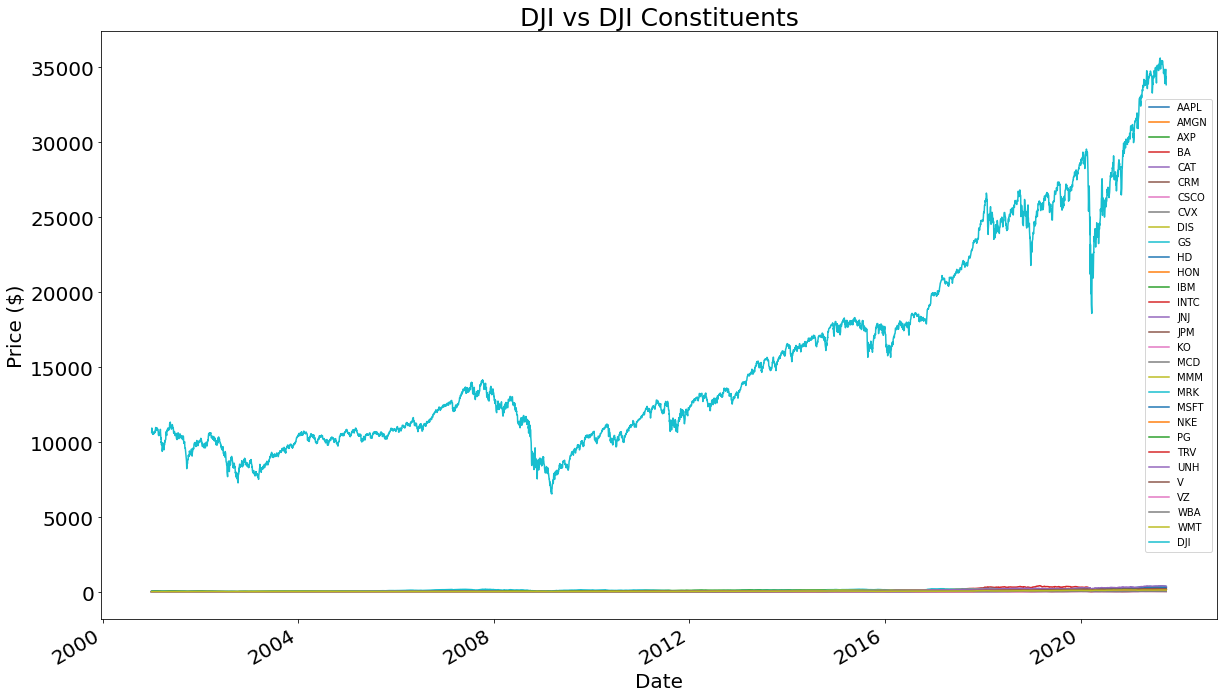

In [7]:
# Plot size and fontsize
df.plot(figsize = (20, 12), fontsize = 20)

# Labels
plt.ylabel('Price ($)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title("DJI vs DJI Constituents", fontsize = 25)

# Show plot
plt.show()

### Normalizing Data

From the graph above - you can't make much out of it because all stocks are starting out at a different price. In order to make the data more meaningful and determine if a stock performs well or not I <b>normalized</b> the prices of all stocks to a <b>common base value</b> (i.e. $100). 

More about normalizing prices <a href="https://www.linnsoft.com/techind/normalized-price" target="_blank">here</a>.

This can be done by doing the following:

1. Divide each and every row by the first row. Should get "1" for the very first row after this is done.

2. Multiply prices by 100 (common initial base value).

So now, all stock prices start at $100 and depending on the individual performance, the stocks (and DJI), end at their respective values - which is now easier to compare.

In [8]:
# divide every row by the first row
# and multiply by 100
normalized = df.div(df.iloc[0])*100
normalized

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000
2001-01-03,110.084137,106.660043,107.737782,100.907272,100.404916,NaN,124.015049,96.145424,111.185665,115.211952,...,110.518712,103.348752,95.063695,99.026731,97.030782,NaN,105.721389,96.171542,108.468625,102.814159
2001-01-04,114.706097,99.701792,104.367268,98.387154,105.128234,NaN,125.703625,94.109111,114.317664,112.468800,...,111.671490,106.004603,92.117809,94.403874,90.243889,NaN,108.830850,91.424193,104.292321,102.500996
2001-01-05,110.084137,92.743533,99.311413,94.758057,99.055325,NaN,109.943752,94.836350,112.751656,107.605956,...,113.256445,101.385697,95.461763,92.700727,91.516437,NaN,108.582111,93.108774,100.116058,100.148968
2001-01-08,111.344579,93.339957,94.255597,95.161311,98.785474,NaN,109.709214,94.618175,107.829955,106.109694,...,112.824213,106.466499,97.531796,95.377136,91.198329,NaN,108.727357,93.874457,100.116058,99.767045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,64418.823792,435.687440,516.738100,546.537164,1464.818196,NaN,230.951890,502.888665,808.634271,501.822029,...,2182.354343,2768.547333,640.315359,517.293144,3317.585126,NaN,309.698151,169.781404,391.864579,326.859933
2021-09-27,63739.206235,434.667626,519.825817,553.375369,1488.485101,NaN,228.875649,514.736067,819.017845,513.325955,...,2144.590597,2739.860755,631.884869,516.731050,3302.834212,NaN,310.267769,171.503453,389.346500,327.530326
2021-09-28,62222.128699,432.954325,509.151100,539.180560,1492.578450,NaN,226.025906,516.685635,801.834412,500.088714,...,2066.948552,2689.150145,627.112020,507.473652,3248.638568,NaN,308.501968,169.008228,384.556652,322.182075


<br></br>

Replotting the graph to see what it looks like now: 

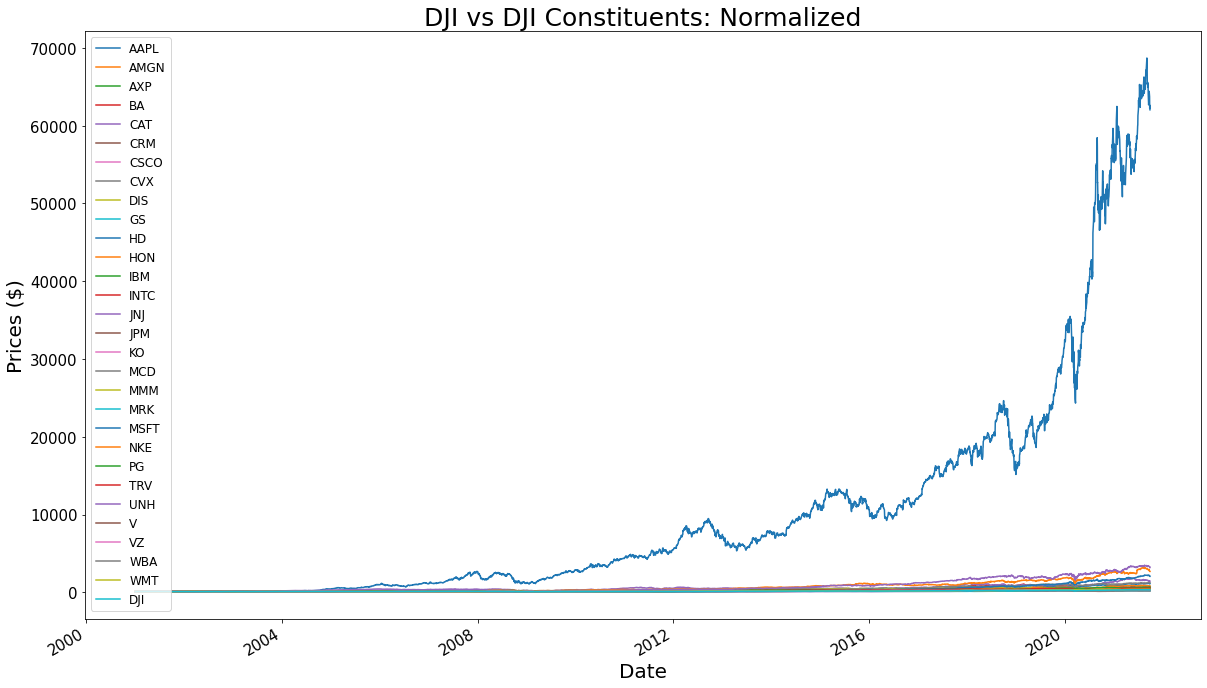

In [9]:
# Plotting graph
normalized.plot(figsize = (20, 12), fontsize = 15)

# Labeling
plt.ylabel('Prices ($)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title("DJI vs DJI Constituents: Normalized",
          fontsize = 25)

# Legend fontsize
plt.legend(fontsize = 12)
plt.labels = True

# Show plot
plt.show()

<br></br>

From the graph, Apple dominates everyone else including DJI. 

I want to see what the graph would look like if AAPL was removed, and what a graph with just Apple vs DJI looks like:

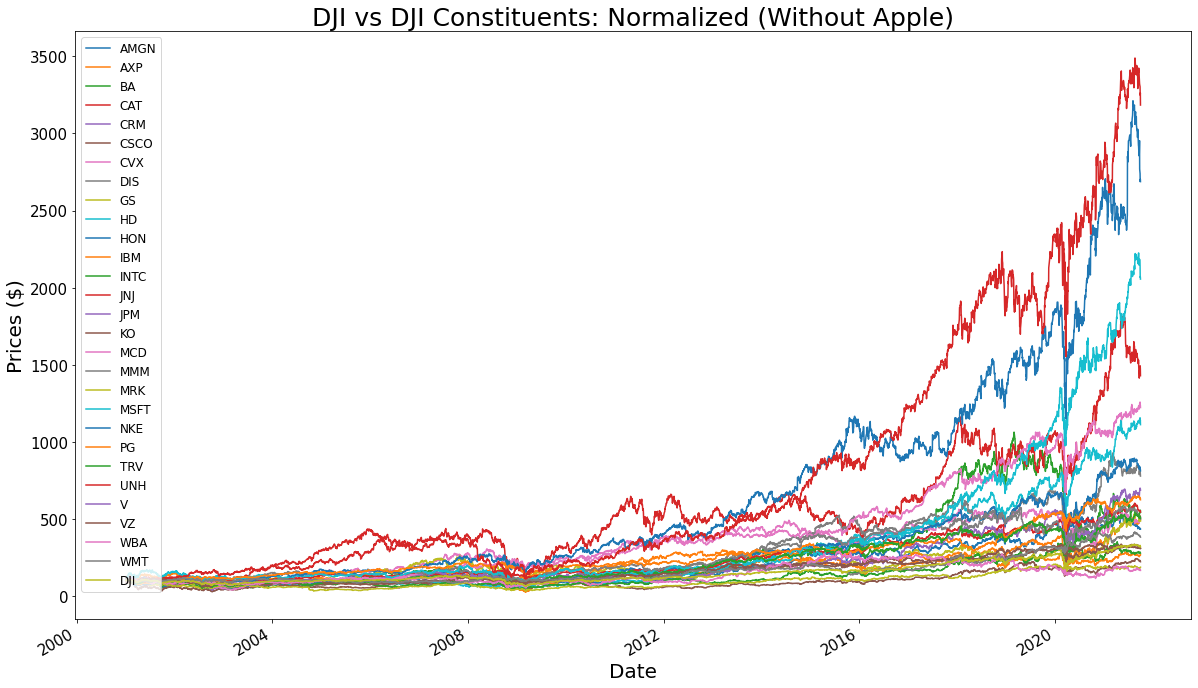

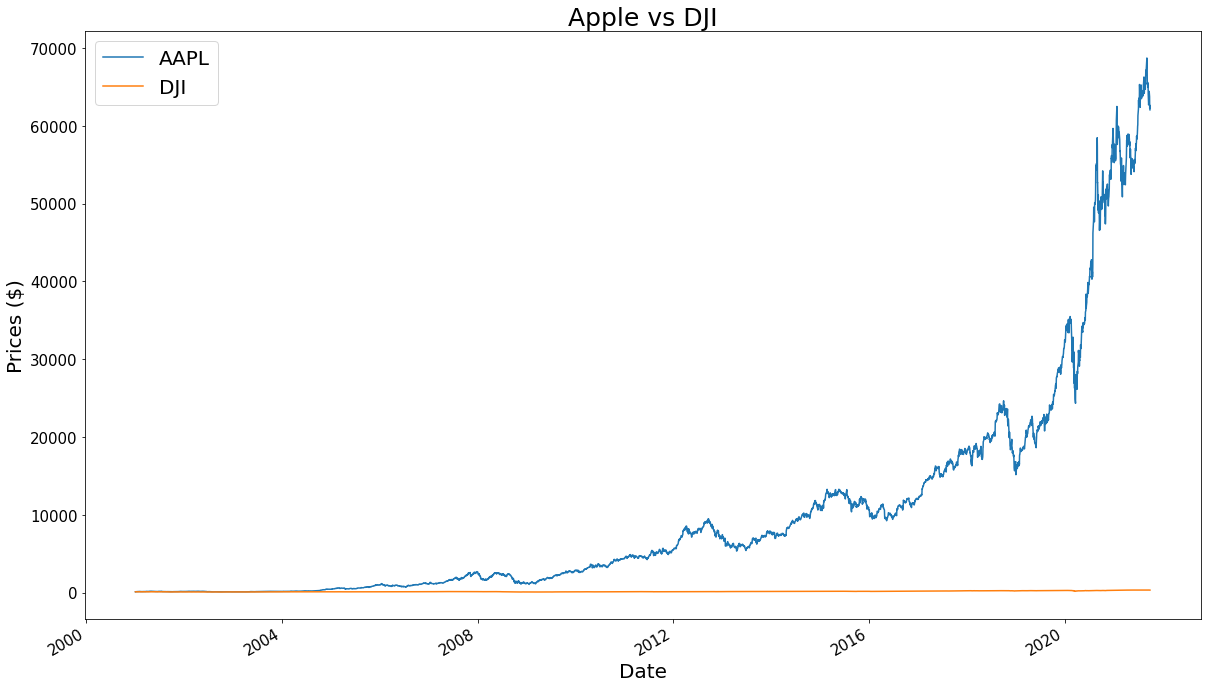

In [10]:
# Drop AAPL and CRM and then plot the graph
normalized.drop(columns = ['AAPL']).plot(figsize = (20,12), fontsize = 15)

# Labeling and adjusting font
plt.legend(fontsize = 12)
plt.ylabel('Prices ($)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title("DJI vs DJI Constituents: Normalized (Without Apple)",
          fontsize = 25)

# Show plot
plt.show()

print('\n')

# Show just AAPL and DJI and plot graph
plot2 = normalized[['AAPL','DJI']].plot(figsize = (20,12), fontsize = 15,
                                                       ylabel = 'Prices ($)')

# Labeling and adjusting font
plt.legend(fontsize = 20)
plt.ylabel('Prices ($)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title("Apple vs DJI", fontsize = 25)

# Show plot
plt.show()

<br></br>

If I want to compare any of the 30 companies <b>in DJI</b> with each other, and with DJI - I've created a function called "compare_companies_with_DJI" that takes as many companies as desired to compare with DJI (as long as they're DJI constituents) and with each other. 

For example, let's say I want to just compare Apple and Microsoft with DJI, I can now just do:

```python
compare_companies_with_DJI('AAPL','MSFT')
```

Note that capitalization of the symbols matter here!

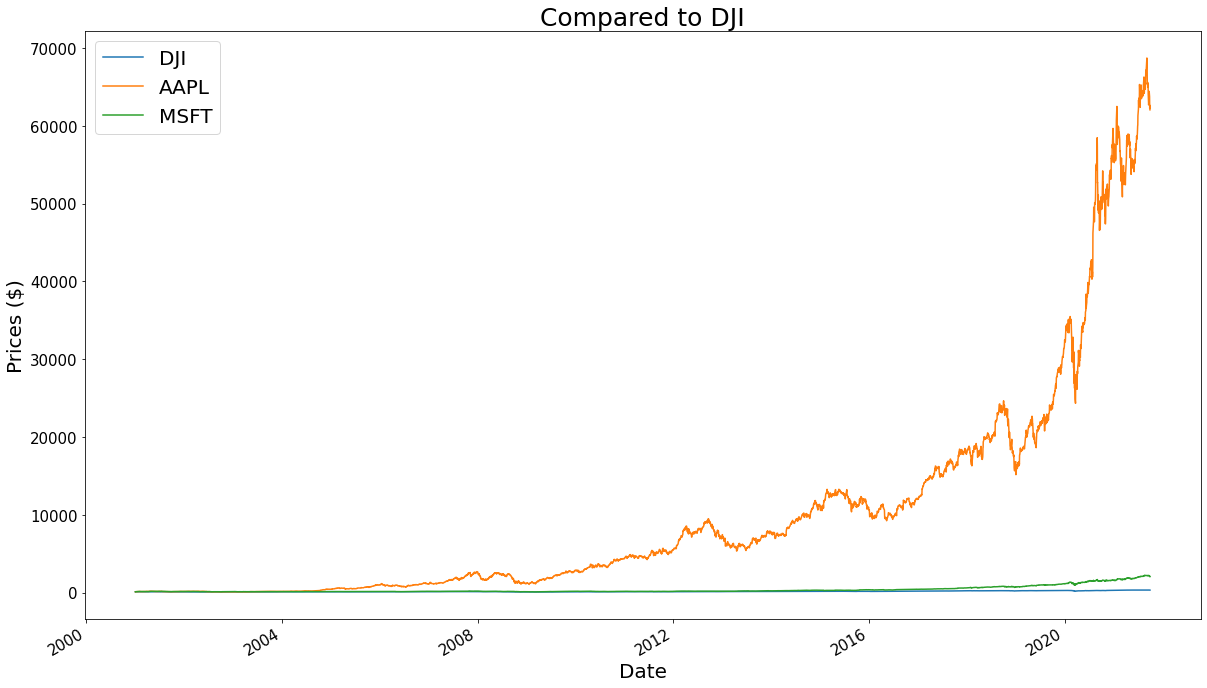

In [11]:
def compare_companies_with_DJI(*args):
    plot = normalized[['DJI', *args]].plot(figsize = (20,12), 
                                               fontsize = 15)
    
    plt.ylabel('Prices ($)', fontsize = 20)
    plt.xlabel('Date', fontsize = 20)
    plt.title('Compared to DJI', fontsize = 25)
    plt.legend(fontsize = 20)
    plt.show()

compare_companies_with_DJI('AAPL','MSFT')

<br></br>
<a id = "#testing"></a>

### Annual Return and Sharpe Ratio

The above charts all still use the <b>absolute prices</b> of the stock which does not say much own it's own. In order to better see how an investment's return compares to other similar investments, I used <a href="https://investmentcache.com/magic-of-log-returns-concept-part-1/" target="_blank">log returns</a> (they can be <a href="https://quantivity.wordpress.com/2011/02/21/why-log-returns/" target="_blank">added across time periods</a>).

Before calculating the log returns, I needed to find the daily return.

This can be done using the formula:

$$\Large Daily\:Returns = \frac{P_{f}-P_{i}}{P_{i}} $$

Where $P_{f}$ is the final price and $P_{i}$ is the initial price. The equation can also be rewritten as:

$$ \Large Daily\:Returns = \frac{P_{f}}{P_{i}} - 1 $$

In [12]:
daily_returns = df.pct_change()
#daily_returns = daily_returns.drop(columns = ['DOW'])

daily_returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.100841,0.066600,0.077378,0.009073,0.004049,NaN,0.240150,-0.038546,0.111857,0.152120,...,0.105187,0.033488,-0.049363,-0.009733,-0.029692,NaN,0.057214,-0.038285,0.084686,0.028142
2001-01-04,0.041986,-0.065238,-0.031284,-0.024975,0.047043,NaN,0.013616,-0.021180,0.028169,-0.023810,...,0.010431,0.025698,-0.030989,-0.046683,-0.069946,NaN,0.029412,-0.049363,-0.038502,-0.003046
2001-01-05,-0.040294,-0.069791,-0.048443,-0.036886,-0.057767,NaN,-0.125373,0.007728,-0.013699,-0.043237,...,0.014193,-0.043573,0.036301,-0.018041,0.014101,NaN,-0.002286,0.018426,-0.040044,-0.022946
2001-01-08,0.011450,0.006431,-0.050909,0.004256,-0.002724,NaN,-0.002133,-0.002301,-0.043651,-0.013905,...,-0.003816,0.050114,0.021684,0.028871,-0.003476,NaN,0.001338,0.008224,0.000000,-0.003814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.000613,-0.006696,0.013613,0.001312,0.001017,0.027964,0.000706,0.005397,-0.001418,-0.002577,...,-0.000701,-0.062602,-0.004439,0.002820,-0.002328,0.014366,-0.000919,-0.003095,0.002802,0.000954
2021-09-27,-0.010550,-0.002341,0.005975,0.012512,0.016157,-0.020831,-0.008990,0.023559,0.012841,0.022924,...,-0.017304,-0.010362,-0.013166,-0.001087,-0.004446,-0.008593,0.001839,0.010143,-0.006426,0.002051
2021-09-28,-0.023801,-0.003942,-0.020535,-0.025651,0.002750,-0.026459,-0.012451,0.003788,-0.020981,-0.025787,...,-0.036204,-0.018508,-0.007553,-0.017915,-0.016409,-0.017596,-0.005691,-0.014549,-0.012302,-0.016329


<br></br>

Once the daily returns have been calculated, I converted them to log returns - and found the average annual return and <a href="https://www.investopedia.com/terms/v/volatility.asp" target="_blank">volatility</a> (standard deviation):  

For <b>average annual returns</b> (after converting from simple returns), I took the mean across all 20 years for each stock (including the DJI index) and multiplied the result by 252.

$$\Large \frac{\sum_{i=1}^{n} x_{i}}{n} \cdot 252$$

Where:

- $x_{i}$ is the return for that respective day
- $n$ is the total number of days
- $252$ is the estimated number of trading days in a year

Here is a <a href="https://www.rateofreturnexpert.com/log-return/" target="_blank">alternative to finding log returns</a>.

<br></br>

For <b>annual volatility</b>, I found the <a href="https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx" target="_blank">standard deviation</a> and multiplied it with <a href="https://www.macroption.com/why-is-volatility-proportional-to-square-root-of-time/" target="_blank">the square root of 252</a>.

$$\Large \sigma_{annual} = \sqrt{\frac{\sum_{i=1}^{n} (x_{i} - \mu)^2}{n}} \cdot \sqrt{252}$$

Where: 

- $\sigma$ is the standard deviation/ volatility
- $n$ is the size of the population (number of days in total)
- $x_{i}$ is each value from the population (each daily return)
- $\mu$ is the annual return
- $252$ is the number of estimated trading days in a year

-----

The annual returns and volatility are then used to to calculate the <a href="https://www.investopedia.com/terms/s/sharperatio.asp" target="_blank">Sharpe Ratio</a>.

The formula for the Sharpe Ratio is:

$$ Sharpe\:Ratio = \Large\frac{R_{p}-R_{f}}{\sigma_{p}} $$

Where:

- $R_{p}$ is the return of expected portfolio return
- $R_{f}$ is the <a href="https://www.investopedia.com/terms/r/risk-freerate.asp" target="_blank">risk-free rate of return </a>
- $\sigma_{p}$ is the standard deviation of portfolio return/ volatility

It's important to note here that I took $R_{f}$ to be zero because the <a href="https://ycharts.com/indicators/3_month_t_bill" target="_blank">average 3 month Treasury Bill interest rate</a> at the time of this project was under 1% (since the bill is the safest investment you can make).

The resulting dataframe can be seen below:

In [13]:
returns = np.log(1+daily_returns).agg(['mean']).T * 252 * 100
volatility = daily_returns.agg(['std']).T * np.sqrt(252) * 100

# assumed risk free rate is 0
overall = pd.concat([returns, volatility], axis=1)
overall['Sharpe_Ratio'] = overall['mean']/overall['std']

overall.rename(columns = {'mean':'Annual_Return',
                          'std':'Annual_Volatility'}, inplace = True)

display(overall.sort_values(by=['Sharpe_Ratio'],ascending=False))

# Function for summary of returns:
def summary_annual(table):
    returns = np.log(1+table).agg(['mean']).T * 252 * 100
    volatility = table.agg(['std']).T * np.sqrt(252) * 100

    # assumed risk free rate is 0
    summary = pd.concat([returns, volatility], axis=1)

    summary.rename(columns = {'mean':'Annual_Return',
                              'std':'Annual_Volatility'}, inplace = True)
    return summary

,Annual_Return,Annual_Volatility,Sharpe_Ratio
AAPL,31.049271,36.435682,0.852167
V,21.081506,30.051926,0.701503
CRM,24.013967,42.627542,0.563344
NKE,15.892216,28.387401,0.559833
MCD,12.086182,22.536394,0.536296
UNH,16.710777,31.213092,0.535377
MSFT,14.596586,28.804972,0.506738
PG,8.837721,18.686129,0.472956
JNJ,8.173522,18.576557,0.439991
CAT,12.840777,31.836158,0.403339


<br></br>

It can be hard to see what the comapanies are looking at just symbols alone - so I've also added the company names into the dataframe.

In [14]:
# Merging dataframes by common column "Symbol"
overall = overall.merge(
    dow_companies.loc[: , ["Symbol","Company"]],
    how = 'left', left_index = True, right_on = 'Symbol')
ordering = ['Symbol','Company','Annual_Return','Annual_Volatility','Sharpe_Ratio']

overall = overall.reindex(columns=ordering)

# Setting index column
overall.set_index("Symbol", inplace = True)

# DJI Closing Price is not part of the 30 companies when
# merging the dow_companies dataframe so it resulted 
# in a 'NaN' company name - renaming it here:
overall['Company'].replace({np.nan:'DJI'}, inplace=True)

display(overall)
print('\n')

,Company,Annual_Return,Annual_Volatility,Sharpe_Ratio
Symbol,,,,
AAPL,Apple Inc.,31.049271,36.435682,0.852167
AMGN,Amgen Inc.,7.084636,29.118646,0.243302
AXP,American Express Company,7.699721,36.060161,0.213524
BA,Boeing Company,8.169170,34.468718,0.237002
CAT,Caterpillar Inc.,12.840777,31.836158,0.403339
CRM,salesforce.com inc.,24.013967,42.627542,0.563344
CSCO,Cisco Systems Inc.,3.841812,35.972727,0.106798
CVX,Chevron Corporation,7.839631,27.727965,0.282734
DIS,Walt Disney Company,9.901329,29.621422,0.334262


------------------

## Exploratory Data Analysis

In this section I compared the historical performance of the 30 stocks (including DJI), taking a look closer into returns and volatility. Typically <a href="https://www.investopedia.com/ask/answers/010915/volatility-good-thing-or-bad-thing-investors-point-view-and-why.asp" target="_blank">high returns go hand-in-hand with higher volatility</a>, but this can also lead to more significant losses.

<i>"The good news is that as volatility increases, the potential to make more money quickly also increases. The bad news is that higher volatility also means higher risk."</i> - <a href="https://www.schwab.com/resource-center/insights/content/how-traders-can-take-advantage-volatile-markets#:~:text=To%20make%20money%20in%20the,there%20must%20be%20price%20movement.&text=The%20speed%20or%20degree%20of,volatility%20also%20means%20higher%20risk." target="_blank">Charles Schwab</a>

Visualizing annual returns and volatility in three plots of descending order: by returns, by volatility, and by sharpe ratio.

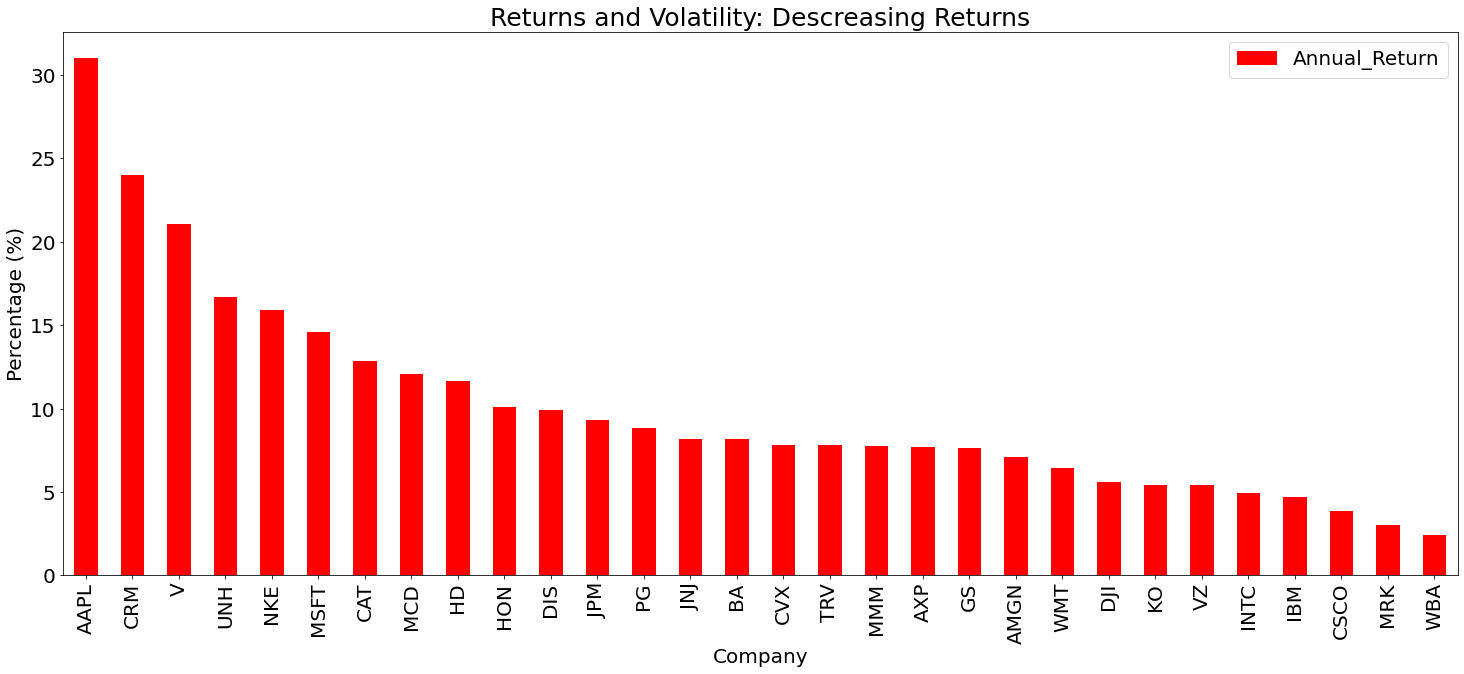

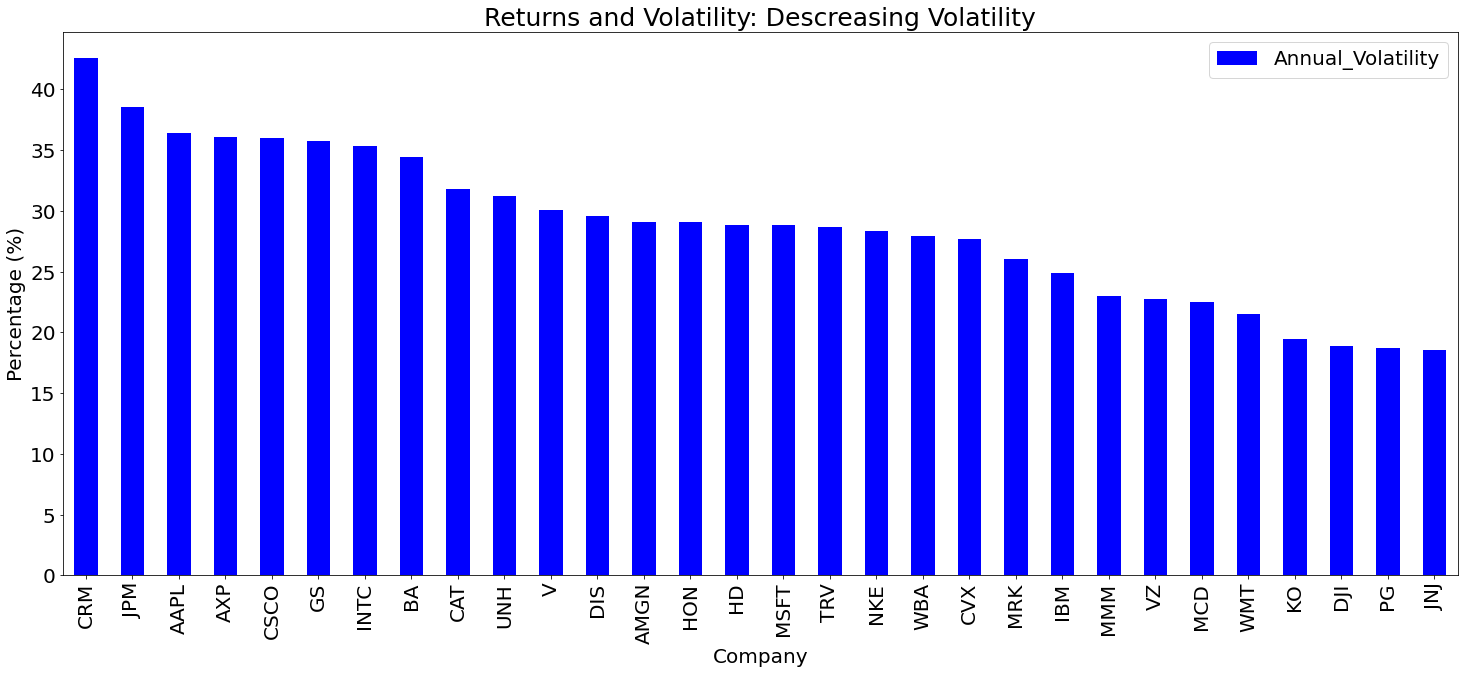

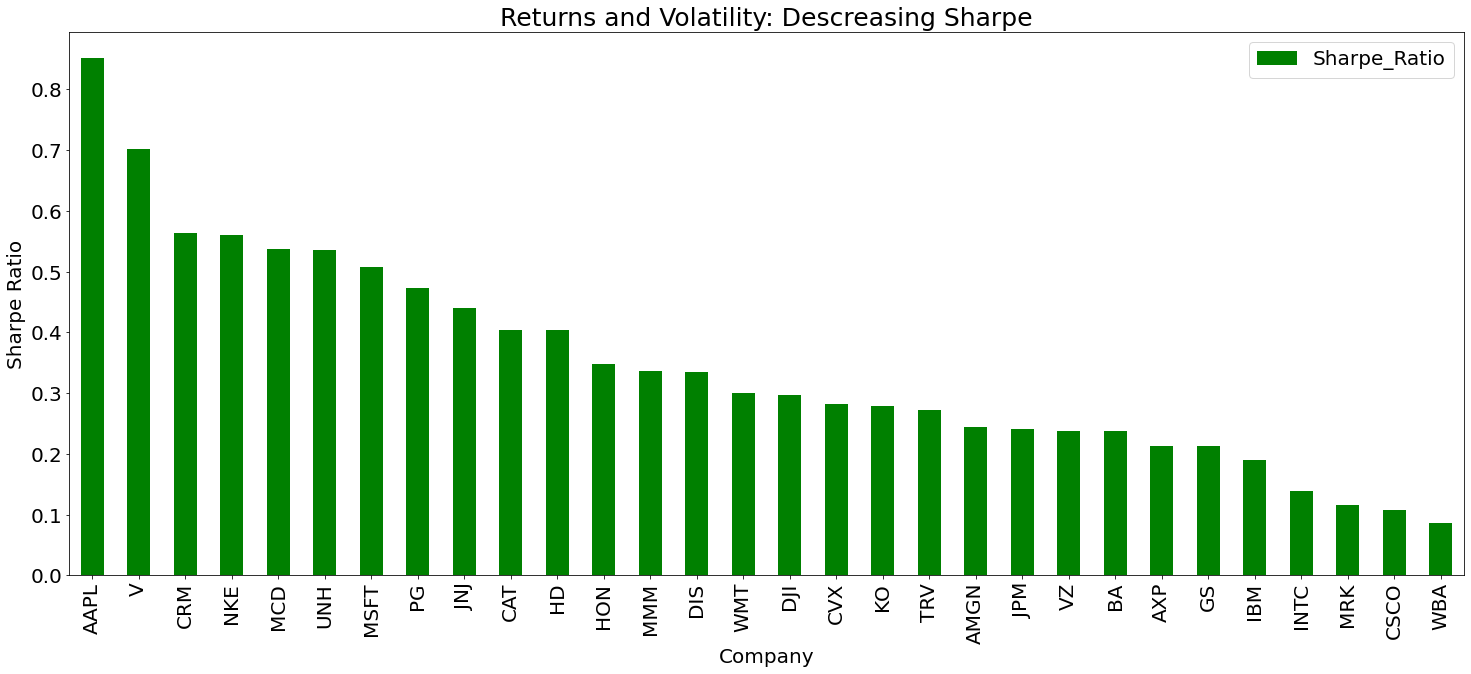

In [15]:
# Sorting and plotting
overall['Annual_Return'].sort_values(ascending = False).plot(kind = 'bar',
                                                      figsize = (25,10),
                                                      fontsize = 20,
                                                      color = 'r')
# Labeling and adjusting fontsize
plt.title('Returns and Volatility: Descreasing Returns', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.legend(fontsize = 20)

# Show plot
plt.show()

print('\n')
print('\n')

overall['Annual_Volatility'].sort_values(ascending = False).plot(kind = 'bar',
                                                          figsize = (25,10),
                                                          fontsize = 20,
                                                          color = 'b')

# Labeling and adjusting fontsize
plt.title('Returns and Volatility: Descreasing Volatility', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.legend(fontsize = 20)

# Show plot
plt.show()

print('\n')
print('\n')

overall['Sharpe_Ratio'].sort_values(ascending = False).plot(kind = 'bar',
                                                          figsize = (25,10),
                                                          fontsize = 20,
                                                          color = 'g')

# Labeling and adjusting fontsize
plt.title('Returns and Volatility: Descreasing Sharpe', fontsize = 25)
plt.ylabel('Sharpe Ratio', fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.legend(fontsize = 20)

# Show plot
plt.show()

<br></br>

Looking at returns and volatility on a scatter plot - the goal is to better visualize companies that have high returns, and ideally, lower volatility.

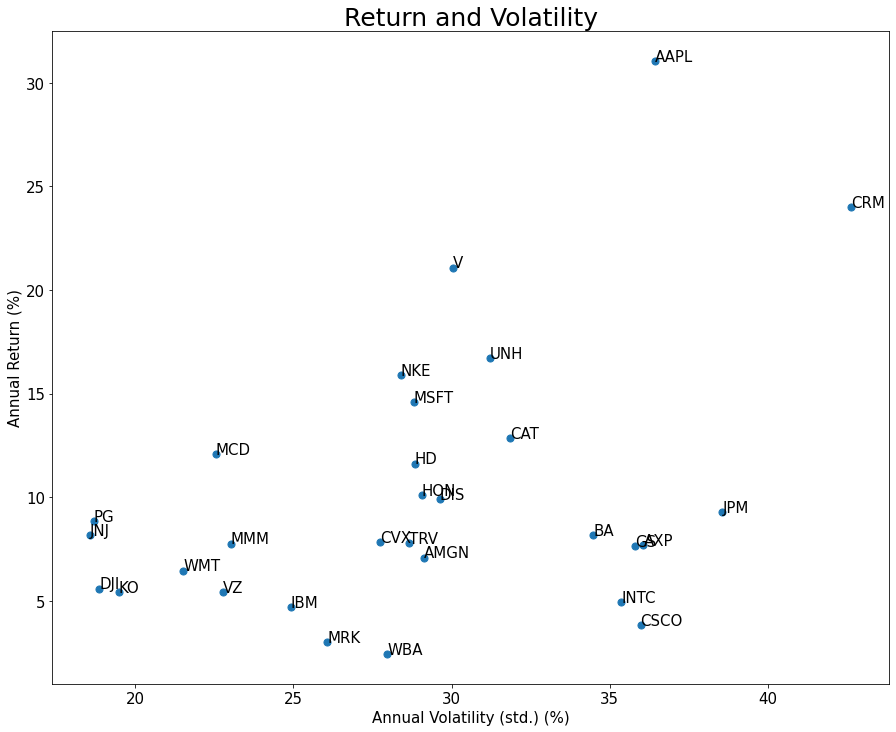

In [16]:
# Creating scatterplot
overall.plot(kind = 'scatter', 
                            x = 'Annual_Volatility',
                            y = 'Annual_Return',
                            figsize = (15,12),
                            s = 50,
                            fontsize = 15)

# Labeling each point on the scatter plot with their respective symbol
for i in overall.index:
    plt.annotate(i, xy=(overall.loc[i, 'Annual_Volatility'],
                        overall.loc[i, 'Annual_Return']), size = 15)

# Labeling
plt.xlabel('Annual Volatility (std.) (%)', fontsize = 15)
plt.ylabel('Annual Return (%)', fontsize = 15)
plt.title('Return and Volatility', fontsize = 25)

# Show plot
plt.show()

<br></br>

Just for fun, I wanted see how these stocks correlated to one another. First, I created a correlation matrix Then, I generated a heatmap because simply looking at the correlation numbers in a dataframe is not very visually appealing.

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
AAPL,1.000000,0.322460,0.402186,0.329356,0.399708,0.402408,0.481450,0.331860,0.393023,0.427180,...,0.507738,0.363471,0.278055,0.332573,0.285376,0.495477,0.305978,0.264593,0.307573,0.547657
AMGN,0.322460,1.000000,0.361515,0.313211,0.344002,0.304957,0.365948,0.354018,0.378473,0.349857,...,0.420567,0.298901,0.372747,0.353096,0.355528,0.391246,0.340027,0.333742,0.344313,0.530218
AXP,0.402186,0.361515,1.000000,0.534513,0.572842,0.389952,0.473987,0.539025,0.600241,0.675113,...,0.498683,0.479874,0.390768,0.574855,0.407905,0.610149,0.436093,0.390476,0.366110,0.764640
BA,0.329356,0.313211,0.534513,1.000000,0.508007,0.333914,0.368802,0.514116,0.502059,0.477362,...,0.413082,0.415635,0.341373,0.440890,0.359213,0.459766,0.323087,0.372777,0.308150,0.693400
CAT,0.399708,0.344002,0.572842,0.508007,1.000000,0.400748,0.448049,0.561925,0.528287,0.558434,...,0.469718,0.437372,0.350243,0.461289,0.354108,0.498487,0.386062,0.387134,0.346362,0.738218
CRM,0.402408,0.304957,0.389952,0.333914,0.400748,1.000000,0.456976,0.350634,0.404069,0.400668,...,0.466084,0.384616,0.290732,0.344836,0.286228,0.481322,0.327701,0.271797,0.268448,0.525822
CSCO,0.481450,0.365948,0.473987,0.368802,0.448049,0.456976,1.000000,0.370700,0.481765,0.504003,...,0.578324,0.399271,0.324995,0.389258,0.264274,0.515234,0.397269,0.306812,0.369187,0.627075
CVX,0.331860,0.354018,0.539025,0.514116,0.561925,0.350634,0.370700,1.000000,0.493248,0.507282,...,0.434316,0.396917,0.406899,0.507607,0.428338,0.510335,0.405296,0.370256,0.297690,0.713850
DIS,0.393023,0.378473,0.600241,0.502059,0.528287,0.404069,0.481765,0.493248,1.000000,0.557711,...,0.504179,0.465902,0.387816,0.472538,0.367120,0.534476,0.454492,0.371552,0.388258,0.725563
GS,0.427180,0.349857,0.675113,0.477362,0.558434,0.400668,0.504003,0.507282,0.557711,1.000000,...,0.505122,0.431667,0.336772,0.538228,0.390211,0.546390,0.400885,0.366776,0.350181,0.724936


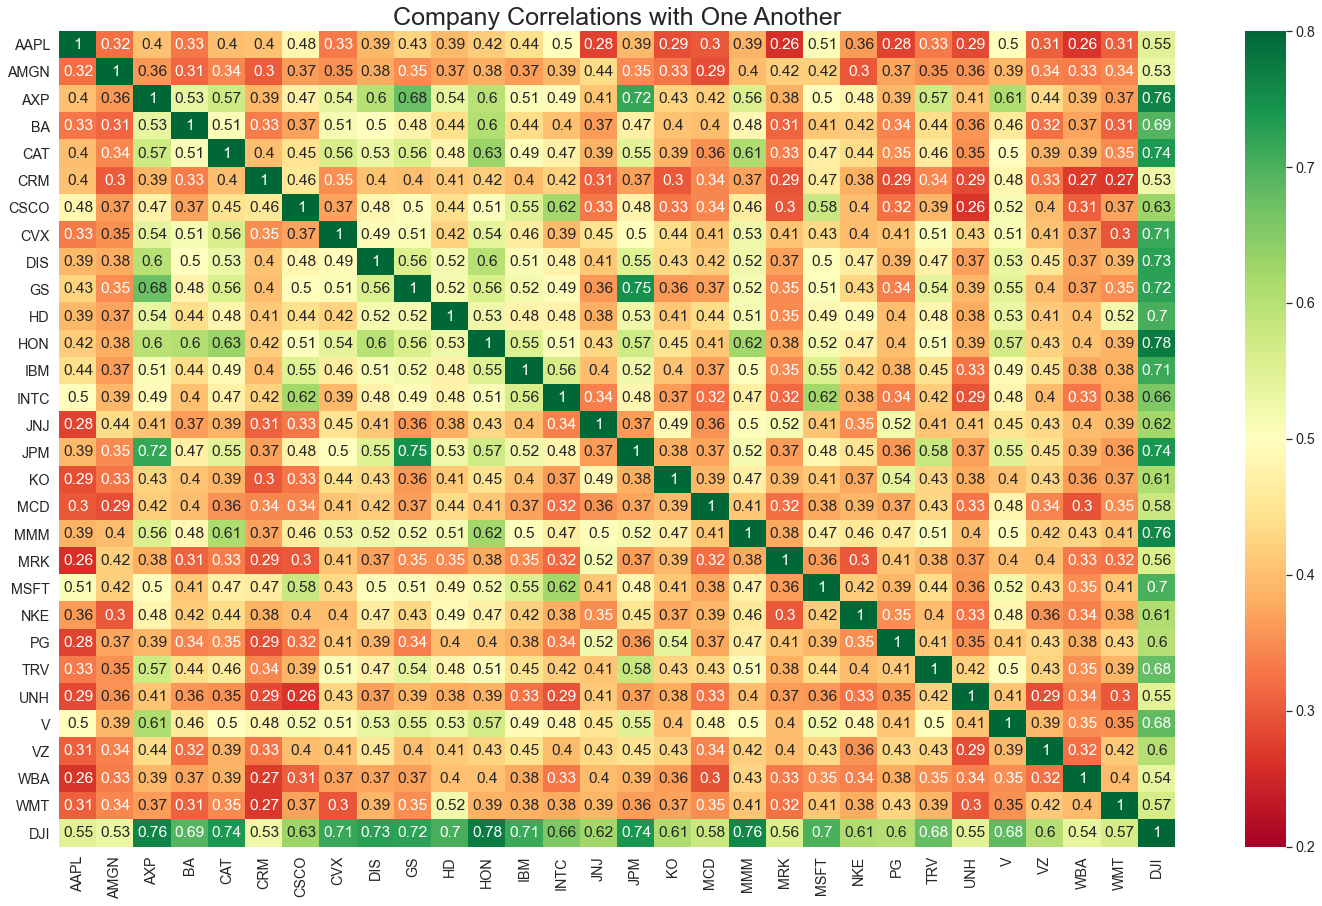

In [17]:
# Creating a correlation matrix using 
corr_matrix = daily_returns.corr()

display(corr_matrix)

print('\n')
print('\n')

# Seaborn heatmap
sns.set(font_scale=1.3)
plt.figure(figsize = (25,15))
sns.heatmap(corr_matrix, cmap = 'RdYlGn', annot = True, vmin = 0.2, vmax = 0.8)
plt.title('Company Correlations with One Another', fontsize = 25)

plt.show()

---------------------------

## Index Tracking Intro

You <a href="https://www.investopedia.com/ask/answers/100214/can-you-buy-shares-dow-jones-industrial-average-djia.asp" target="_blank">cannot invest in the <b>DJIA Index</b></a> itself! 

### The Plan

1. Track the DJI using a subset of only <b>10 stocks</b>.

    The criteria in choosing which specific 10 stocks to include in the tracking portfolio will be to look at those with the lowest individual <a href="https://www.investopedia.com/terms/t/trackingerror.asp" target="_blank">tracking error</a> (TE). I will calculate the TE in the training/ fitting period. 

    - Training Period: 2017 & 2018
    - Forward Testing Period: 2019


2. Fit the parameters of the portfolio to the data in the training period (2 years). This doesn't guarantee that the tracking portfolio does a good job on new data so I will <a href="https://en.wikipedia.org/wiki/Walk_forward_optimization#:~:text=Forward%20testing%20(also%20known%20as,is%20also%20called%20Paper%20Trading." target="_blank"><b>forward test</b></a> the tracking portfolio's ability to track the index and use 2019 as the forward test period.


3. Lastly, once I identified the 10 stocks to include in the tracking portfolio, I need to find their optimal weights in the portfolio to minimize TE.

<br></br>

First let's select the closing prices of stocks (including DJI) only within 2017 and 2018 and normailze these prices.

In [18]:
# Recall the dataframe "df" that contains
# the closing price data of all companies
# including the DJI prices. I created this
# dataframe back in the section:
# "Visualizing DJI Prices vs Each Company's Prices" 

# Only selecting the two years: 2017, 2018
# and store in dataframe "df2"
df2 = df.loc['2017':'2018'].copy()

# Normalizing df2 (setting base start prices
# of all companies to $100)
# Divide every row by the first row
# and multiply by 100
df2_normalized = df2.div(df2.iloc[0])*100
print('\033[4mNormalized Prices for 2017-2018 Only\033[0m')
display(df2_normalized)

print('\n')
print('\n')

# Recall the returns (percent change) dataframe
# called "daily_returns". I'm going to adjust 
# it so that it only contains data from the years
# 2017-2018 and assign it to a new variable name:
daily_returns2 = daily_returns['2017':'2018'].copy()
print('\033[4mDaily Returns (percent change) for 2017-2018 Only\033[0m')
display(daily_returns2)

Normalized Prices for 2017-2018 Only


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,99.888061,101.419741,101.639336,101.051145,99.553150,103.203859,99.405556,99.974557,101.282048,100.645790,...,99.552566,102.096975,100.356262,99.462371,100.284942,100.817623,99.890061,100.024121,100.582594,100.303798
2017-01-05,100.396034,101.492714,100.386506,101.108486,98.946720,103.189680,99.636711,99.541799,101.225480,99.896495,...,99.552566,102.077726,101.021342,97.874295,100.452158,102.000008,100.109930,100.084379,100.801036,100.088168
2017-01-06,101.515259,104.013820,100.586423,101.356931,98.989247,104.621494,99.834876,99.142985,102.733794,101.378485,...,100.415466,103.712956,100.985715,97.824646,100.594619,103.408808,98.624836,100.168801,99.417393,100.412645
2017-01-09,102.445100,105.380458,101.106221,100.860019,98.276408,104.848310,99.669744,98.294457,102.149320,100.546415,...,100.095876,102.693354,100.237501,97.038872,100.309708,102.830180,97.550783,99.505839,100.072818,100.028273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,130.375324,125.246033,122.448907,196.404247,131.042461,172.001702,140.759822,92.535881,97.592202,66.440524,...,156.436078,134.260476,110.769668,97.546598,148.435612,155.230856,106.758070,82.149564,131.267322,109.609006
2018-12-26,139.556565,131.887436,128.386662,209.604227,139.793571,185.483406,148.412830,98.400126,102.921599,69.236665,...,167.122184,143.940625,114.231205,101.478614,155.069128,166.070097,109.555306,85.246248,138.288041,115.072556
2018-12-27,138.650876,133.621519,129.535907,211.747491,141.933746,191.664297,149.950428,100.168560,103.592631,70.290532,...,168.152579,145.241827,116.678368,102.777732,156.738664,168.339966,110.984126,86.051851,140.092896,116.382154






Daily Returns (percent change) for 2017-2018 Only


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.002850,0.030915,0.017144,0.008286,0.013479,0.030383,0.010589,0.001274,0.017847,0.008854,...,0.007081,0.022624,0.001427,-0.012416,0.008810,0.018970,0.022480,0.002416,-0.006655,0.006030
2017-01-04,-0.001119,0.014197,0.016393,0.010511,-0.004469,0.032039,-0.005944,-0.000254,0.012820,0.006458,...,-0.004474,0.020970,0.003563,-0.005376,0.002849,0.008176,-0.001099,0.000241,0.005826,0.003038
2017-01-05,0.005085,0.000720,-0.012326,0.000567,-0.006092,-0.000137,0.002325,-0.004329,-0.000559,-0.007445,...,0.000000,-0.000189,0.006627,-0.015967,0.001667,0.011728,0.002201,0.000602,0.002172,-0.002150
2017-01-06,0.011148,0.024840,0.001991,0.002457,0.000430,0.013876,0.001989,-0.004006,0.014901,0.014835,...,0.008668,0.016019,-0.000353,-0.000507,0.001418,0.013812,-0.014835,0.000844,-0.013726,0.003242
2017-01-09,0.009160,0.013139,0.005168,-0.004903,-0.007201,0.002168,-0.001654,-0.008559,-0.005689,-0.008208,...,-0.003183,-0.009831,-0.007409,-0.008032,-0.002832,-0.005596,-0.010890,-0.006618,0.006593,-0.003828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.025874,-0.010044,-0.020037,-0.034116,-0.025985,-0.012855,-0.037515,-0.030899,-0.037133,-0.023118,...,-0.041739,-0.059002,-0.039683,-0.029554,-0.022657,-0.020361,-0.034049,-0.029735,-0.015035,-0.029100
2018-12-26,0.070422,0.053027,0.048492,0.067208,0.066781,0.078381,0.054369,0.063373,0.054609,0.042085,...,0.068310,0.072100,0.031250,0.040309,0.044690,0.069827,0.026202,0.037696,0.053484,0.049846
2018-12-27,-0.006490,0.013148,0.008951,0.010225,0.015310,0.033323,0.010360,0.017972,0.006520,0.015221,...,0.006166,0.009040,0.021423,0.012802,0.010766,0.013668,0.013042,0.009450,0.013051,0.011381


<br></br>

Next I needed a metric that allows us to measure how well a stock the portfolio tracks the DJIA index (tracking error). In order to calculate an individual stock's tracking error, I had to calculate the return differences between the stock's daily return and the daily returns of the index - DJI.

Looking at the average return difference and tracking error (standard deviation of return differences):

In [19]:
# Subtract DJI index's daily returns from
# each individual stock's daily returns:
return_difference = daily_returns2.sub(daily_returns2.DJI, axis = 0)

print('\033[4mreturn_difference DataFrame\033[0m')
display(return_difference)

print('\n')

print('\033[4mMean and Standard Deviation of return_difference DataFrame\033[0m')
return_difference.agg(['mean','std']).T

return_difference DataFrame


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.024885,0.011114,0.002257,0.007449,0.024353,0.004560,-0.004755,0.011817,0.002824,...,0.001051,0.016595,-0.004602,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.0
2017-01-04,-0.004157,0.011159,0.013355,0.007473,-0.007506,0.029001,-0.008982,-0.003292,0.009783,0.003420,...,-0.007512,0.017932,0.000525,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,0.0
2017-01-05,0.007235,0.002869,-0.010176,0.002717,-0.003942,0.002012,0.004475,-0.002179,0.001591,-0.005295,...,0.002150,0.001961,0.008777,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,0.0
2017-01-06,0.007906,0.021598,-0.001250,-0.000785,-0.002812,0.010634,-0.001253,-0.007248,0.011659,0.011593,...,0.005426,0.012778,-0.003595,-0.003749,-0.001824,0.010570,-0.018077,-0.002398,-0.016968,0.0
2017-01-09,0.012988,0.016967,0.008996,-0.001075,-0.003373,0.005996,0.002174,-0.004731,-0.001861,-0.004380,...,0.000645,-0.006003,-0.003581,-0.004205,0.000996,-0.001768,-0.007062,-0.002791,0.010421,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.003226,0.019057,0.009063,-0.005015,0.003115,0.016245,-0.008414,-0.001799,-0.008033,0.005983,...,-0.012638,-0.029902,-0.010583,-0.000453,0.006444,0.008740,-0.004949,-0.000635,0.014066,0.0
2018-12-26,0.020576,0.003181,-0.001354,0.017362,0.016935,0.028535,0.004523,0.013527,0.004763,-0.007761,...,0.018464,0.022254,-0.018596,-0.009537,-0.005156,0.019981,-0.023644,-0.012150,0.003638,0.0
2018-12-27,-0.017870,0.001768,-0.002429,-0.001155,0.003929,0.021943,-0.001020,0.006591,-0.004861,0.003841,...,-0.005215,-0.002341,0.010042,0.001421,-0.000614,0.002288,0.001661,-0.001930,0.001671,0.0




Mean and Standard Deviation of return_difference DataFrame


,mean,std
AAPL,0.000423,0.011551
AMGN,0.000404,0.010621
AXP,0.000271,0.008371
BA,0.001306,0.011383
CAT,0.000512,0.012324
CRM,0.001156,0.013168
CSCO,0.000575,0.009421
CVX,-0.000293,0.009830
DIS,-0.000137,0.009600
GS,-0.000927,0.009978


<br></br>

10 stocks with the lowest tracking error:

In [20]:
# Function for annualized tracking error
def tracking_annual(returns):
    summary = returns.agg(['mean','std']).T
    summary['Premium'] = summary['mean']*252
    summary['TE'] = summary['std']*np.sqrt(252)
    summary.drop(columns = ['mean','std'], inplace=True)
    return summary

tracking = tracking_annual(return_difference)
tracking.sort_values(by=['TE'],ascending=True).head(11)

,Premium,TE
DJI,0.000000,0.000000
HON,0.027266,0.097587
MMM,-0.016593,0.124732
JPM,0.011050,0.131719
V,0.198522,0.131906
KO,0.015625,0.132854
AXP,0.068362,0.132882
HD,0.071983,0.134151
TRV,-0.065867,0.136851
UNH,0.162464,0.138580


<br></br>

Selecting stocks with lowest tracking error:

In [21]:
num_stocks = 10

tracking_stocks = tracking.sort_values(by='TE').index[:num_stocks+1]
tracking_stocks

Index(['DJI', 'HON', 'MMM', 'JPM', 'V', 'KO', 'AXP', 'HD', 'TRV', 'UNH',
       'JNJ'],
      dtype='object')

Normalized prices of the 10 tracking stocks with visualization:

In [22]:
norm_track = df2_normalized.loc[:, tracking_stocks]
display(norm_track)

tracking_stocks = tracking_stocks[1:]
display(tracking_stocks)

print('\n')

,DJI,HON,MMM,JPM,V,KO,AXP,HD,TRV,UNH,JNJ
Date,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275461,100.151655,100.184446,100.817623,99.641156,101.639336,100.886026,99.462371,100.284942,99.836009
2017-01-05,100.088168,100.499235,99.809052,99.262255,102.000008,99.880385,100.386506,99.694743,97.874295,100.452158,100.880519
2017-01-06,100.412645,102.022745,100.101107,99.273784,103.408808,99.856475,100.586423,99.419282,97.824646,100.594619,100.397120
2017-01-09,100.028273,101.179221,99.561938,99.342955,102.830180,98.851683,101.106221,100.000000,97.038872,100.309708,100.379850
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,116.761168,105.399882,110.514233,155.230856,117.580292,122.448907,123.177476,97.546598,148.435612,111.749105
2018-12-26,115.072556,121.194784,109.908082,115.096004,166.070097,120.087434,128.386662,131.075682,101.478614,155.069128,115.269684
2018-12-27,116.382154,123.065517,112.528027,116.391367,168.339966,121.596830,129.535907,132.664655,102.777732,156.738664,115.906500


Index(['HON', 'MMM', 'JPM', 'V', 'KO', 'AXP', 'HD', 'TRV', 'UNH', 'JNJ'], dtype='object')

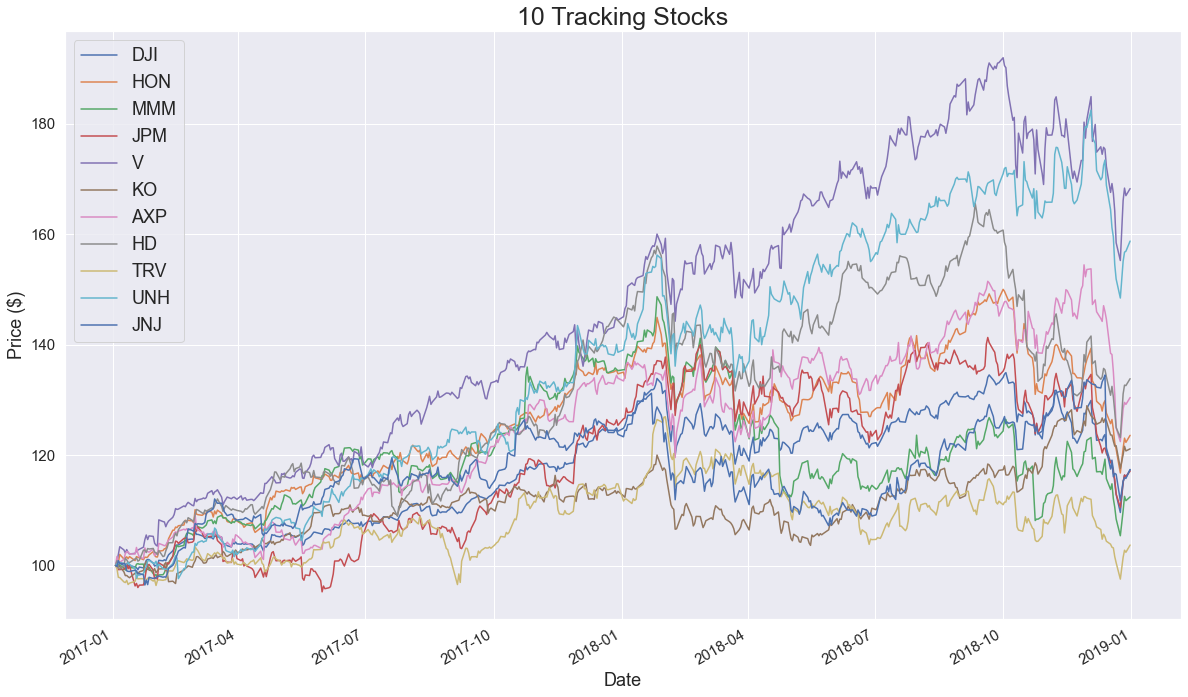

In [23]:
norm_track.plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=18)
plt.title('10 Tracking Stocks',fontsize=25)
plt.ylabel('Price ($)',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.show()

------------

## Tracking Portfolio

The tracking portfolio consists of 10 stocks of equal weight (meaning if the entire portfolio sums up to 100%, each stock weighs 10%). 

In [24]:
# Numpy arrary for optimization
eweights = np.full(num_stocks, 1/num_stocks) 
# shape is 10 and each and every value is 1/10, or 10%

display(tracking_stocks)
eweights

Index(['HON', 'MMM', 'JPM', 'V', 'KO', 'AXP', 'HD', 'TRV', 'UNH', 'JNJ'], dtype='object')

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

<br></br>

Average return of entire portfolio (all 10 stocks) by date. 

In [25]:
# More general- for portfolios that are not equally
# weighted. Uses the .dot() function 
display(daily_returns2.loc[:, tracking_stocks].dot(eweights))

# Function that returns portfolio
# returns (based on weights)
def portfolio_return(weights): # pass in weights array that sum up to 1
    return daily_returns2.loc[:, tracking_stocks].dot(weights)

Date
2017-01-03    0.005872
2017-01-04    0.003179
2017-01-05   -0.002424
2017-01-06    0.002712
2017-01-09   -0.002864
                ...   
2018-12-24   -0.026711
2018-12-26    0.044247
2018-12-27    0.012693
2018-12-28   -0.003730
2018-12-31    0.009294
Length: 502, dtype: float64

<br></br>

Target here is to find a portfolio that minimizes the tracking error. I've created a function for the tracking error based on weights in the portfolio and found the tracking error to be ~4%. 

Taking a look at individual stock tracking errors from above - the lowest TE belonged to HON (Honeywell International Inc.) at ~9.8% so the resulting portfolio TE of 4% is pretty good.

In [26]:
# Function to minimize tracking error of tracking portfolio
def tracking_error(weights):
    '''
    First, get the return differences between the tracking
    portfolio and the the Dow Jones index. Then, calculate
    the standard deviation. This will result in daily 
    tracking errors which can then be annualized by 
    multiplying it with the square root of 252
    '''
    return portfolio_return(weights).sub(daily_returns2.DJI).std() * np.sqrt(252)

tracking_error(eweights) # Finding tracking error for equally weighted portfolio

0.04108390448476967

<br></br>

Calculating the cumulative investment multiple for each and every timestamp (cumulative product).

In [27]:
# Base starting value of 100. Starting with the second day.
ew_port = portfolio_return(eweights)[1:].add(1).cumprod()*100
display(ew_port)

# adding portfolio tracking to overall dataframe
norm_track['EW_Portfolio'] = ew_port

# setting first row NaN value to $100
norm_track.iloc[0,-1] = 100

display(norm_track)

Date
2017-01-04    100.317902
2017-01-05    100.074765
2017-01-06    100.346184
2017-01-09    100.058759
2017-01-10    100.145147
                 ...    
2018-12-24    121.598666
2018-12-26    126.979008
2018-12-27    128.590780
2018-12-28    128.111131
2018-12-31    129.301748
Length: 501, dtype: float64

,DJI,HON,MMM,JPM,V,KO,AXP,HD,TRV,UNH,JNJ,EW_Portfolio
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275461,100.151655,100.184446,100.817623,99.641156,101.639336,100.886026,99.462371,100.284942,99.836009,100.317902
2017-01-05,100.088168,100.499235,99.809052,99.262255,102.000008,99.880385,100.386506,99.694743,97.874295,100.452158,100.880519,100.074765
2017-01-06,100.412645,102.022745,100.101107,99.273784,103.408808,99.856475,100.586423,99.419282,97.824646,100.594619,100.397120,100.346184
2017-01-09,100.028273,101.179221,99.561938,99.342955,102.830180,98.851683,101.106221,100.000000,97.038872,100.309708,100.379850,100.058759
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,116.761168,105.399882,110.514233,155.230856,117.580292,122.448907,123.177476,97.546598,148.435612,111.749105,121.598666
2018-12-26,115.072556,121.194784,109.908082,115.096004,166.070097,120.087434,128.386662,131.075682,101.478614,155.069128,115.269684,126.979008
2018-12-27,116.382154,123.065517,112.528027,116.391367,168.339966,121.596830,129.535907,132.664655,102.777732,156.738664,115.906500,128.590780


<br></br>

Visualizing the data:

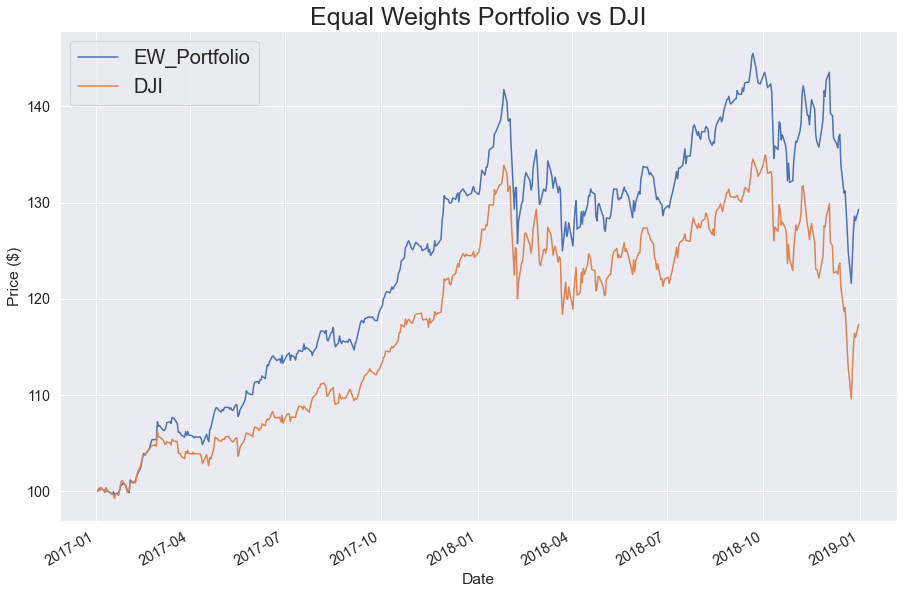

In [28]:
norm_track[['EW_Portfolio', 'DJI']].plot(figsize=(15,10))
plt.title('Equal Weights Portfolio vs DJI',fontsize=25)
plt.legend(fontsize=20, loc=2)
plt.ylabel('Price ($)')
plt.show()

The equal weights portfolio actually outperforms DJI. In the next section, I will minimize TE and try to optimize the portfolio so that it can match DJI even closer.

<br></br>

### Optimal Tracking Portfolio

This section is for optimizing the tracking portfolio to match DJI even more closely by minimizing tracking error (TE). 

In [29]:
import scipy.optimize as sco

This time, I will find the optimal weights for 10 stocks (rather than having equal weights for all 10).

In [30]:
# constraint: weights must sum up to 1
# or in other words: sum of weights - 1 = 0
constraints = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
print(constraints)

print('\n')

# bounds: all weights should be between 0 and 1
# do not allow short selling
bounds = tuple((0,1) for x in range(num_stocks))
print('Bounds are:', bounds)

{'type': 'eq', 'fun': <function <lambda> at 0x7fbcfe0114c0>}


Bounds are: ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


<br></br>

Annualized tracking error of the optimal portfolio (fitted portfolio) is found to be 3.8% (slightly better than the tracking error of the equal weights portfolio earlier - which was 4%).

More on the <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html" target="_blank">different optimization functions here</a>. Big thanks to <a href="https://www.linkedin.com/in/victor-cai/" target="_blank">Victor Cai</a> for helping me with this part.

In [31]:
# Run optimization based on function to be minimized, 
# starting with equal weights and based on 
# respective bounds and constraints

# 1. Want to minimize tracking_error
# 2. Define a starting point of the optimization --> eweights
# 3. Method: Sequential Least Squares Programming = "SLSQP"
# 4 & 5. Pass bounds and constraints
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", 
                    bounds=bounds, constraints=constraints)
opts

     fun: 0.03818862122146198
     jac: array([0.01225549, 0.01157373, 0.01211744, 0.01161652, 0.01175767,
       0.01169752, 0.01182727, 0.01214011, 0.01171757, 0.01203866])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.09719712, 0.11630603, 0.15505613, 0.16041873, 0.08520841,
       0.03948499, 0.10982361, 0.05778348, 0.11320725, 0.06551426])

<br></br>

The optimal weights for each of the 10 stocks that make up the optimal portfolio for tracking DJI is shown below:

In [32]:
# extracting optimal weights
optimal_weights = opts['x']
display(optimal_weights)

opt_weight_stocks = pd.Series(index=tracking_stocks, 
                              data=optimal_weights)


opt_weight_stocks.sort_values(ascending=False)

array([0.09719712, 0.11630603, 0.15505613, 0.16041873, 0.08520841,
       0.03948499, 0.10982361, 0.05778348, 0.11320725, 0.06551426])

V      0.160419
JPM    0.155056
MMM    0.116306
UNH    0.113207
HD     0.109824
HON    0.097197
KO     0.085208
JNJ    0.065514
TRV    0.057783
AXP    0.039485
dtype: float64

<br></br>

Getting the daily returns of the optimal portfolio:

In [33]:
# daily returns by passing optimal_weights
opt_port_returns = portfolio_return(optimal_weights)[1:].add(1).cumprod()*100
display(opt_port_returns)

# adding info to overall dataframe
norm_track['Opt_Port'] = opt_port_returns

# setting first row NaN value to $100
norm_track.iloc[0,-1] = 100

display(norm_track)

Date
2017-01-04    100.326081
2017-01-05    100.190218
2017-01-06    100.552861
2017-01-09    100.248429
2017-01-10    100.276905
                 ...    
2018-12-24    124.345479
2018-12-26    130.130182
2018-12-27    131.859194
2018-12-28    131.336125
2018-12-31    132.502039
Length: 501, dtype: float64

,DJI,HON,MMM,JPM,V,KO,AXP,HD,TRV,UNH,JNJ,EW_Portfolio,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275461,100.151655,100.184446,100.817623,99.641156,101.639336,100.886026,99.462371,100.284942,99.836009,100.317902,100.326081
2017-01-05,100.088168,100.499235,99.809052,99.262255,102.000008,99.880385,100.386506,99.694743,97.874295,100.452158,100.880519,100.074765,100.190218
2017-01-06,100.412645,102.022745,100.101107,99.273784,103.408808,99.856475,100.586423,99.419282,97.824646,100.594619,100.397120,100.346184,100.552861
2017-01-09,100.028273,101.179221,99.561938,99.342955,102.830180,98.851683,101.106221,100.000000,97.038872,100.309708,100.379850,100.058759,100.248429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,116.761168,105.399882,110.514233,155.230856,117.580292,122.448907,123.177476,97.546598,148.435612,111.749105,121.598666,124.345479
2018-12-26,115.072556,121.194784,109.908082,115.096004,166.070097,120.087434,128.386662,131.075682,101.478614,155.069128,115.269684,126.979008,130.130182
2018-12-27,116.382154,123.065517,112.528027,116.391367,168.339966,121.596830,129.535907,132.664655,102.777732,156.738664,115.906500,128.590780,131.859194


<br></br>

Visualizing the data:

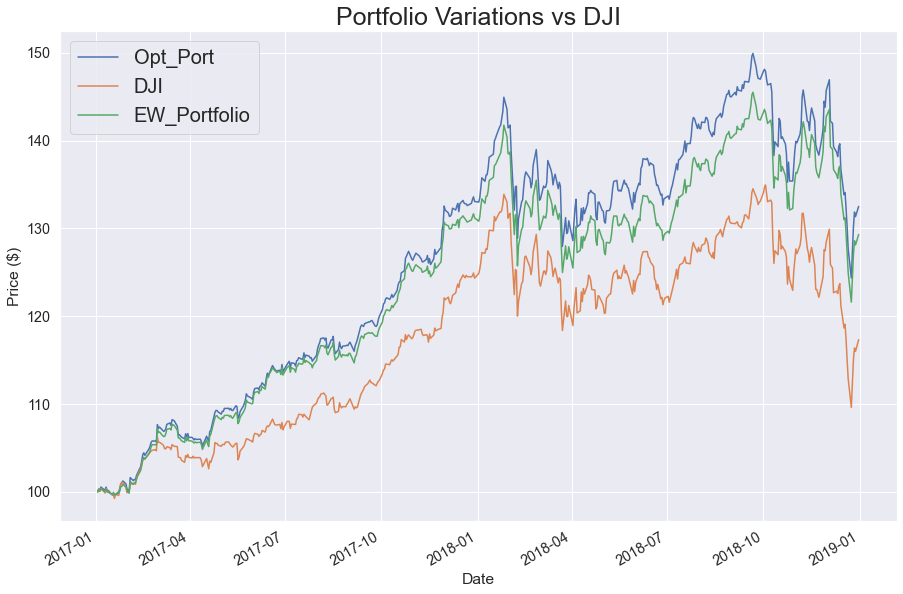

In [34]:
norm_track[['Opt_Port', 'DJI', 'EW_Portfolio']].plot(figsize=(15,10))
plt.title('Portfolio Variations vs DJI',fontsize=25)
plt.legend(fontsize=20, loc=2)
plt.ylabel('Price ($)')
plt.show()

<br></br>

Calculating the annual returns and volatility of the portfolios:

In [35]:
summary_annual(norm_track[['Opt_Port','EW_Portfolio',
                           'DJI']].pct_change())

,Annual_Return,Annual_Volatility
Opt_Port,14.155652,13.312864
EW_Portfolio,12.925870,12.912138
DJI,8.039279,13.520564


<br></br>

Taking a look back at individual constituent return and volatility:

In [36]:
summary_annual(daily_returns).sort_values(by='Annual_Return', 
                                          ascending=False)

,Annual_Return,Annual_Volatility
AAPL,31.049271,36.435682
CRM,24.013967,42.627542
V,21.081506,30.051926
UNH,16.710777,31.213092
NKE,15.892216,28.387401
MSFT,14.596586,28.804972
CAT,12.840777,31.836158
MCD,12.086182,22.536394
HD,11.626355,28.834713
HON,10.109139,29.051867


---------

## Forward Testing

The optimized portfolio closely tracks the Dow Jones index in the two year period from 2017 to 2018, which is not surprising becuase I optimized the portfolio based on the data in this period. 

In this section, I will test how the portfolio performs (tracks the index) in the future with new data. The forward testing time period will be the entire 2019 year. 

In [37]:
# Recall dataframe df with all adj. close prices in the past ~20 years,
# the daily_returns dataframe, and the 10 tracking stocks with the lowest
# tracking errors out of all DJI constituents
print('\033[4mConstituent Adj. Close Prices\033[0m')
display(df)
print('\n')

print('\033[4mConstituent Daily Returns\033[0m')
display(daily_returns)
print('\n')

print('\033[4m10 Tracking Stocks\033[0m')
display(tracking_stocks)

Constituent Adj. Close Prices


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.227738,48.620068,33.921295,40.507767,13.362697,NaN,24.398731,19.775864,21.765093,77.477318,...,13.691789,5.393500,22.280519,30.072714,12.230480,NaN,17.349758,28.181887,36.389065,10646.150391
2001-01-03,0.250703,51.858185,36.546051,40.875282,13.416804,NaN,30.258099,19.013588,24.199663,89.263130,...,15.131989,5.574115,21.180685,29.780025,11.867331,NaN,18.342405,27.102955,39.470718,10945.750000
2001-01-04,0.261229,48.475079,35.402729,39.854439,14.047967,NaN,30.670090,18.610889,24.881346,87.137810,...,15.289824,5.717359,20.524326,28.389807,11.037261,NaN,18.881889,25.765062,37.951000,10912.410156
2001-01-05,0.250703,45.091969,33.687717,38.384373,13.236463,NaN,26.824881,18.754707,24.540503,83.370209,...,15.506833,5.468238,21.269377,27.877625,11.192900,NaN,18.838734,26.239809,36.431297,10662.009766
2001-01-08,0.253573,45.381950,31.972719,38.547722,13.200403,NaN,26.767656,18.711561,23.469290,82.210945,...,15.447653,5.742271,21.730591,28.682493,11.153994,NaN,18.863934,26.455593,36.431297,10621.349609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,146.705887,211.831528,175.284256,221.389999,195.739212,285.630005,56.349331,99.450577,176.000000,388.798248,...,298.803345,149.321609,142.665588,155.564087,405.756592,231.183014,53.731880,47.847603,142.595856,34798.000000
2021-09-27,145.158142,211.335693,176.331650,224.160004,198.901749,279.679993,55.842754,101.793503,178.259995,397.711182,...,293.632812,147.774399,140.787231,155.395050,403.952484,229.196518,53.830708,48.332909,141.679550,34869.371094
2021-09-28,141.703186,210.502686,172.710648,218.410004,199.448730,272.279999,55.147453,102.179047,174.520004,387.455322,...,283.002228,145.039322,139.723816,152.611099,397.324097,225.163620,53.524345,47.629707,139.936569,34299.988281




Constituent Daily Returns


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.100841,0.066600,0.077378,0.009073,0.004049,NaN,0.240150,-0.038546,0.111857,0.152120,...,0.105187,0.033488,-0.049363,-0.009733,-0.029692,NaN,0.057214,-0.038285,0.084686,0.028142
2001-01-04,0.041986,-0.065238,-0.031284,-0.024975,0.047043,NaN,0.013616,-0.021180,0.028169,-0.023810,...,0.010431,0.025698,-0.030989,-0.046683,-0.069946,NaN,0.029412,-0.049363,-0.038502,-0.003046
2001-01-05,-0.040294,-0.069791,-0.048443,-0.036886,-0.057767,NaN,-0.125373,0.007728,-0.013699,-0.043237,...,0.014193,-0.043573,0.036301,-0.018041,0.014101,NaN,-0.002286,0.018426,-0.040044,-0.022946
2001-01-08,0.011450,0.006431,-0.050909,0.004256,-0.002724,NaN,-0.002133,-0.002301,-0.043651,-0.013905,...,-0.003816,0.050114,0.021684,0.028871,-0.003476,NaN,0.001338,0.008224,0.000000,-0.003814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.000613,-0.006696,0.013613,0.001312,0.001017,0.027964,0.000706,0.005397,-0.001418,-0.002577,...,-0.000701,-0.062602,-0.004439,0.002820,-0.002328,0.014366,-0.000919,-0.003095,0.002802,0.000954
2021-09-27,-0.010550,-0.002341,0.005975,0.012512,0.016157,-0.020831,-0.008990,0.023559,0.012841,0.022924,...,-0.017304,-0.010362,-0.013166,-0.001087,-0.004446,-0.008593,0.001839,0.010143,-0.006426,0.002051
2021-09-28,-0.023801,-0.003942,-0.020535,-0.025651,0.002750,-0.026459,-0.012451,0.003788,-0.020981,-0.025787,...,-0.036204,-0.018508,-0.007553,-0.017915,-0.016409,-0.017596,-0.005691,-0.014549,-0.012302,-0.016329




10 Tracking Stocks


Index(['HON', 'MMM', 'JPM', 'V', 'KO', 'AXP', 'HD', 'TRV', 'UNH', 'JNJ'], dtype='object')

<br></br>

To make my life easier and for the future I created functions to calculate the tracking error, and for visualizing the returns of portfolios. 

The tracking errors for the 2019 year for an optimized portfolio is shown below

In [38]:
# function for tracking error
def tracking_error_general(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, 
                    tracking_stocks].dot(weights).sub(daily_returns.loc[start:end, 
                                                                        index]).std()*np.sqrt(252)

# function for visuals
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod()*100
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize=(12,8))
    track.plot()
    index.plot()
    plt.title('Portfolio vs DJI',fontsize=25)
    plt.legend(fontsize=20, loc=2)
    plt.ylabel('Price ($)')
    plt.show()

In [39]:
print('\033[4mThe 2017-2018 tracking error is:\033[0m')
display(tracking_error_general(daily_returns, tracking_stocks, 
                               optimal_weights, "DJI", 
                               "2017-01-01", "2018-12-31"))

forward_te = tracking_error_general(daily_returns, tracking_stocks, 
                                optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
print('\n')

print('\033[4mThe 2019 tracking error is:\033[0m')
display(forward_te)

The 2017-2018 tracking error is:


0.03818862122146198



The 2019 tracking error is:


0.04582741575762314

<br></br>

Visualizing the returns of the optimized portfolio with DJI for the 2019 year. The optimized portfolio still closely tracks the Dow Jones index!

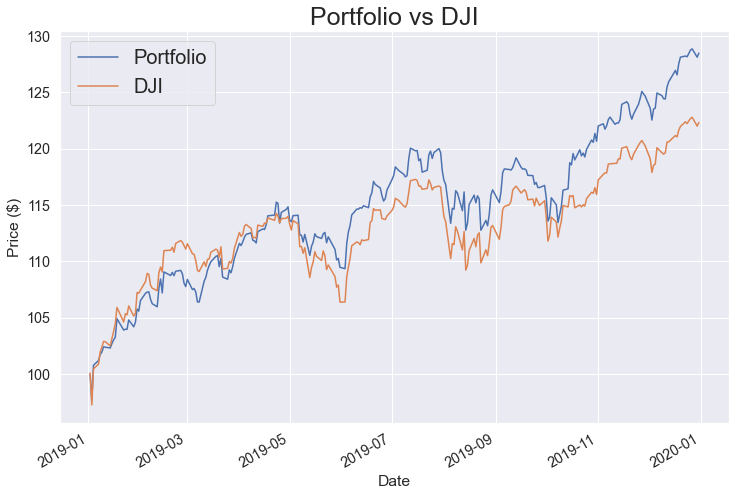

In [40]:
visual(daily_returns, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2019-12-31")

<br></br>

### Forward Testing Random Portfolio

To really make sure the optimization works, I decided to compare a portfolio of random stocks (still made up of DJI constituents) and see if it still closely tracks the index. If at least 50% of the random portfolios actually track the index <b>closer than the optimized portfolio created above</b>, I will need to investigate more complex methods of tracking.

Creating random portfolio (10 random stocks and random weights of each):

In [41]:
# All available stocks to choose from
# excluding DJI and DOW
print('\033[4mAvailable Stocks to Choose From:\033[0m')
avail_stocks = df.columns.drop(["DJI"])
display(avail_stocks)

print('\n')

# draw random samples (10 stocks without replacement) 
# from avail_stocks with 10 random weights
np.random.seed(123)
random_stocks = np.random.choice(avail_stocks, size=num_stocks, replace=False)
random_nums = np.random.random(num_stocks)
random_weights = random_nums/random_nums.sum()

random_port = pd.Series(index=random_stocks, data=random_weights)
print('\033[4m10 Random Stocks and their Random Weights:\033[0m')
random_port.sort_values(ascending=False)

Available Stocks to Choose From:


Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')



10 Random Stocks and their Random Weights:


PG     0.198234
V      0.148535
IBM    0.131365
CRM    0.098733
CVX    0.085847
VZ     0.083710
NKE    0.075000
DIS    0.071776
WMT    0.059747
HON    0.047053
dtype: float64

<br></br>

The tracking error for the random portfolio came out to 6.5%, which is greater than the TE of the optimized portfolio for the same year (recall that the optimized portfolio had a tracking error of 4.6% for the 2019 year).

In [42]:
tracking_error_general(daily_returns, random_stocks, random_weights, 
                       "DJI", '2019-01-01', '2019-12-31')

0.06515411934492521

Looking at the visual difference between the Random Portfolio vs DJI - the discrepencies are much greater than the Optimized Portfolio vs DJI.

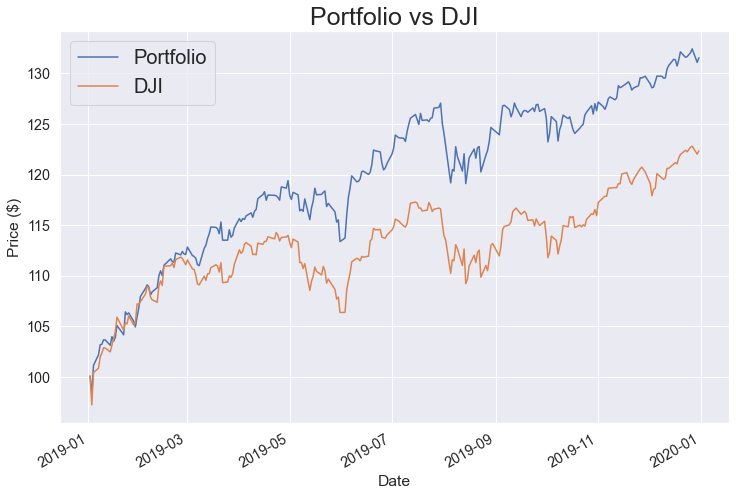

In [43]:
visual(daily_returns, random_stocks, random_weights, 
       'DJI', '2019-01-01', '2019-12-31')

<br></br>

Extrapolating the mean tracking error for 10,000 random portfolios, only ~2.5% out of the 10,000 random portfolios happened to have a better (lower) tracking error than the TE of the optimized portfolio earlier. This indicates the tracking portfolio created earlier is capable of tracking the Dow Jones index.

The average tracking error of all 10,000 random portfolios is nearly 6%.

Percentage of random portfolios with better tracking errors than optimized portfolio: 2.54 %




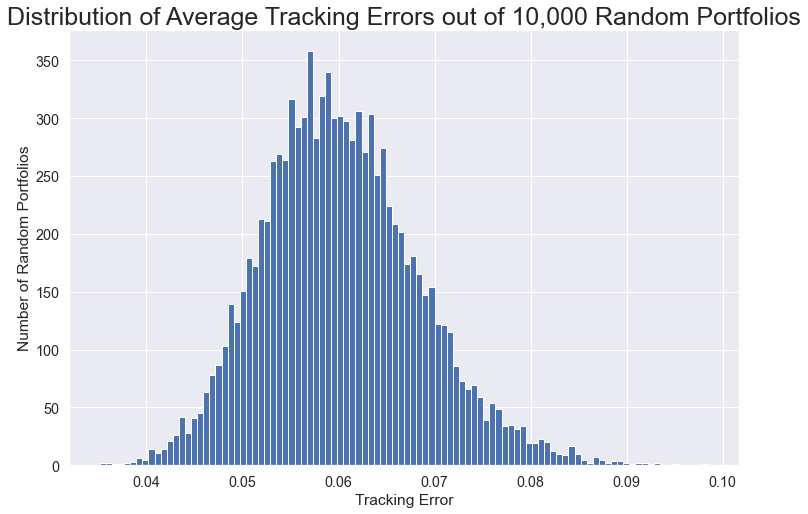

In [44]:
tracking_errors_test = np.empty(10000)

np.random.seed(123)

for i in range(10000):
    random_nums = np.random.random(num_stocks)
    random_weights = random_nums/random_nums.sum()
    random_stocks = np.random.choice(avail_stocks, size=num_stocks, replace=False)
    
    tracking_errors_test[i] = tracking_error_general(daily_returns,
                                                     random_stocks,
                                                     random_weights,
                                                     'DJI',
                                                     '2019-01-01','2019-12-31')

# check whether the tracking error of random portfolio
# is less than the TE of the optimized portfolio
better = (tracking_errors_test < forward_te).mean()*100
print('Percentage of random portfolios with better tracking errors than optimized portfolio:', better,'%')

print('\n')

plt.figure(figsize = (12, 8))
plt.hist(tracking_errors_test, bins = 100)
plt.title('Distribution of Average Tracking Errors out of 10,000 Random Portfolios',
         fontsize=25)
plt.ylabel('Number of Random Portfolios')
plt.xlabel('Tracking Error')
plt.show()

<br></br>

<center><a href="#Index-Tracking-Portfolio">Click here</a> to return to top of page.</center>

<br></br>